In [2]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
from scipy import stats

def spearmanr(*args, **kwargs):
    return stats.spearmanr(*args, **kwargs).correlation

In [10]:
from multicam.mah import get_mah

mah_data = get_mah('../../data/processed/bolshoi_m12/', cutoff_missing=0.05, cutoff_particle=0.05)

In [11]:
# catalog
cat = mah_data['cat']
cvir = cat['cvir']
ma = mah_data['ma']
ma_peak = mah_data['ma_peak']

indices = mah_data['indices']
scales = mah_data['scales']

## Illustration of repeated values with `ma_peak`

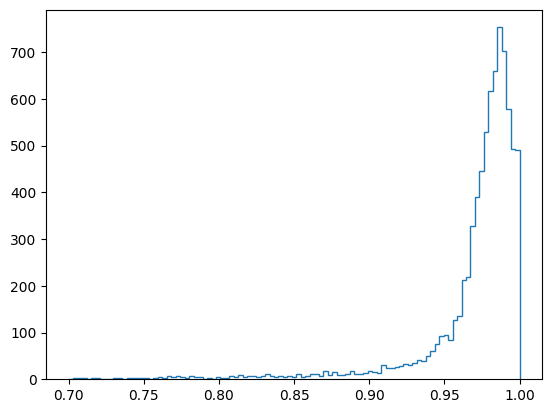

In [ ]:
_ = plt.hist(ma[:, 150], bins=101, histtype='step', range=(0.7, 1), label='MA')

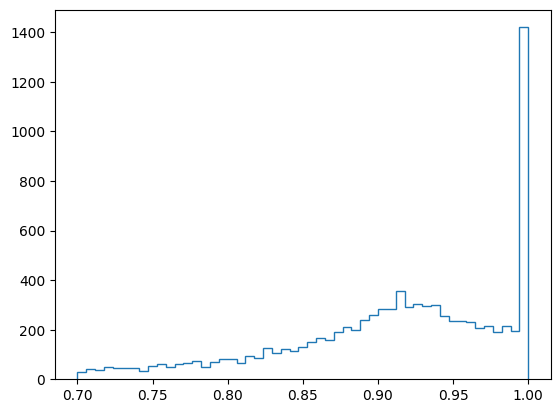

In [ ]:
_ = plt.hist(ma_peak[:, 101], bins=51, histtype='step', range=(0.7, 1), label='MA peak')

## Predictions (with `ma`)

In [12]:
x = ma 
y = cvir[:, None]

In [13]:
from multicam.models import MultiCAM

model = MultiCAM(n_features=165, n_targets=1)

model.fit(x,y)

In [14]:
y_pred = model.predict(x)

In [15]:
# significant correlation drop
spearmanr(y[:,0], y_pred[:,0])

0.8032954959114869

In [16]:
model.predict(x[0, None, :])[0,0], model.predict(x)[0,0] # same

(7.250506401062012, 7.250506401062012)

## Predictions (with `ma_peak`)

Note that `ma_peak` has many more repeated values than `ma` especially for the late time features.

In [17]:
x = ma_peak 
y = cvir[:, None]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
model = MultiCAM(n_features=165, n_targets=1)

model.fit(x_train, y_train)

In [20]:
y_pred = model.predict(x_test)

In [22]:
spearmanr(y_test[:,0], y_pred[:,0])

0.8101725764807913

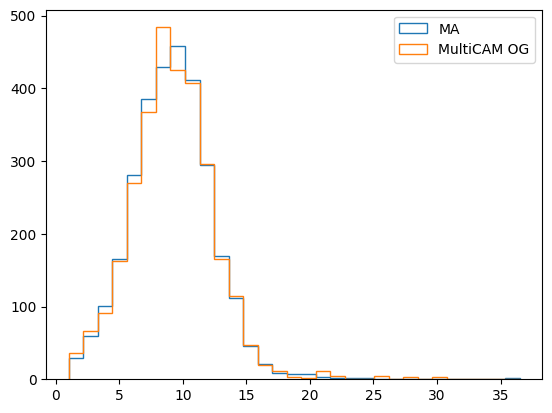

In [23]:
_, bins, _ = plt.hist(y_test[:,0], bins=31, histtype='step', label='MA')
_ = plt.hist(y_pred[:,0], bins=bins, histtype='step', label='MultiCAM OG')
plt.legend()

In [24]:
model.predict(x[0, None, :])[0,0], model.predict(x)[0,0] # can very different.

(8.811203002929688, 8.811203002929688)